<a href="https://colab.research.google.com/github/flybiubiu/cs231n/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nholmber/google-colab-cs231n.git
%cd google-colab-cs231n/assignment1
!pip install imageio
%cd cs231n/datasets/
!/content/google-colab-cs231n/assignment1/cs231n/datasets/get_datasets.sh
%cd '/content/google-colab-cs231n/assignment1'

Cloning into 'google-colab-cs231n'...
remote: Enumerating objects: 109, done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 109
Receiving objects: 100% (109/109), 5.07 MiB | 3.54 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/google-colab-cs231n/assignment1
/content/google-colab-cs231n/assignment1/cs231n/datasets
--2019-09-26 11:48:39--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  16.0MB/s    in 12s     

2019-09-26 11:48:51 (14.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-b

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cs231n.data_utils import load_CIFAR10

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
%load_ext autoreload
%autoreload 2

In [4]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Training data shape: ', X_test.shape)
print ('Training labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Training data shape:  (10000, 32, 32, 3)
Training labels shape:  (10000,)


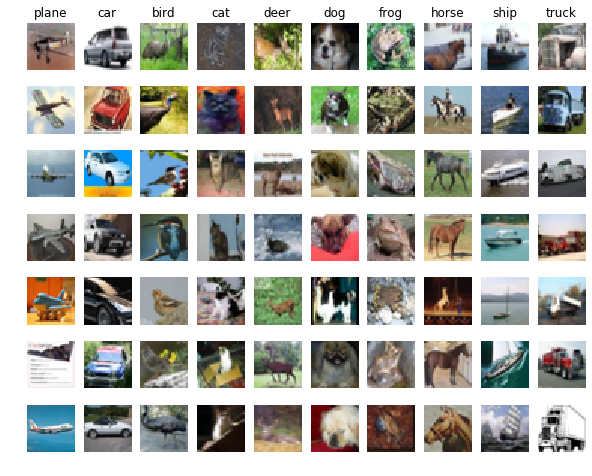

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
  idxs = np.flatnonzero(y_train == y)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + y + 1
    plt.subplot(samples_per_class, num_classes, plt_idx)
    plt.imshow(X_train[idx].astype('uint8'))
    plt.axis('off')
    if i == 0:
      plt.title(cls)
plt.show()

In [6]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print ('Train data shape:', X_train.shape)
print ('Train labels shape:', y_train.shape)
print ('Validation data shape', X_val.shape)
print ('Validation labels shape:', y_val.shape)
print ('Test data shape:', X_test.shape)
print ('Test labels shape:', y_test.shape)

Train data shape: (49000, 32, 32, 3)
Train labels shape: (49000,)
Validation data shape (1000, 32, 32, 3)
Validation labels shape: (1000,)
Test data shape: (1000, 32, 32, 3)
Test labels shape: (1000,)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


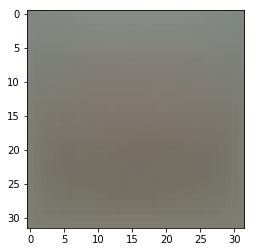

In [8]:
mean_image = np.mean(X_train, axis=0)
print (mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

In [0]:
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [10]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
print (X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [11]:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time
W = np.random.randn(3073, 10) * 0.0001
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0001)
print ('loss: %f'% (loss, ))

loss: 8.776407


In [12]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 9.750628 analytic: 9.750628, relative error: 4.080539e-11
numerical: -36.118811 analytic: -36.118811, relative error: 9.677136e-12
numerical: 4.865036 analytic: 4.865036, relative error: 2.796372e-11
numerical: 16.747741 analytic: 16.747741, relative error: 2.428920e-11
numerical: -57.255885 analytic: -57.255885, relative error: 2.244464e-12
numerical: 9.297761 analytic: 9.297761, relative error: 1.296155e-11
numerical: 23.299606 analytic: 23.299606, relative error: 1.455860e-11
numerical: 5.051778 analytic: 5.051778, relative error: 2.499299e-12
numerical: -12.199219 analytic: -12.199219, relative error: 2.616224e-11
numerical: 12.171077 analytic: 12.171077, relative error: 6.269240e-13


In [13]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -8.490043 analytic: -8.490043, relative error: 5.053919e-11
numerical: -5.475555 analytic: -5.475555, relative error: 2.410134e-11
numerical: 10.458411 analytic: 10.458411, relative error: 2.610588e-13
numerical: -10.944406 analytic: -10.944406, relative error: 2.998319e-11
numerical: 10.894767 analytic: 10.894767, relative error: 5.752046e-12
numerical: 22.545239 analytic: 22.545239, relative error: 1.950592e-11
numerical: 1.582483 analytic: 1.582483, relative error: 2.565128e-10
numerical: 5.971883 analytic: 5.971883, relative error: 4.202942e-11
numerical: 3.584114 analytic: 3.584114, relative error: 1.539103e-11
numerical: -3.518011 analytic: -3.518011, relative error: 3.942769e-11


In [14]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))
from cs231n.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))
print ('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 8.776407e+00 computed in 0.145181s
Vectorized loss: 8.776407e+00 computed in 0.014686s
difference: -0.000000


In [15]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Naive loss and gradient: computed in %fs' % (toc - tic))
tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
print ('Vectorized loss and gradient: computed in %fs' % (toc - tic))
difference = np.linalg.norm(grad_naive - grad_vectorized, ord = 'fro')
print ('difference: %f' % difference)

Naive loss and gradient: computed in 0.152959s
Vectorized loss and gradient: computed in -0.000722s
difference: 0.000000


In [17]:
from cs231n.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate = 1e-7, reg = 5e4, num_iters = 1500, verbose = True)#verbose信息展示方式
toc = time.time()
print ('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 1562.103774
iteration 100 / 1500: loss 210.522367
iteration 200 / 1500: loss 33.307954
iteration 300 / 1500: loss 9.041834
iteration 400 / 1500: loss 5.825048
iteration 500 / 1500: loss 5.476313
iteration 600 / 1500: loss 6.401728
iteration 700 / 1500: loss 5.516627
iteration 800 / 1500: loss 5.512379
iteration 900 / 1500: loss 6.004881
iteration 1000 / 1500: loss 5.884702
iteration 1100 / 1500: loss 6.322820
iteration 1200 / 1500: loss 5.893307
iteration 1300 / 1500: loss 5.750089
iteration 1400 / 1500: loss 6.028838
That took 7.435331s


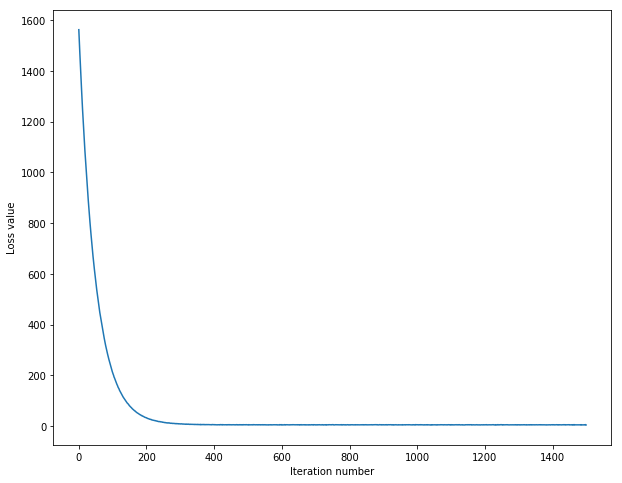

In [18]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [19]:
y_train_pred = svm.predict(X_train)
print ('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print ('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.354918
validation accuracy: 0.362000


In [23]:
learning_rates = [1e-7, 5e-6]
regularization_strengths = [5e4, 1e5]
results = {}
beat_val = -1
beat_svm = None
pass
for lr in learning_rates:
  for rs in regularization_strengths:
    svm = LinearSVM()
    loss_hist = svm.train(X_train, y_train, learning_rate = lr, reg = rs, num_iters = 1500, verbose = True)
    y_train_pred = svm.predict(X_train)
    train_acc = np.mean(y_train == y_train_pred)
    y_val_pred = svm.predict(X_val)
    val_acc = np.mean(y_val == y_val_pred)
    results[(lr, rs)] = (train_acc, val_acc)
    if val_acc > beat_val:
      best_val = val_acc
      best_svm = svm
for lr, reg in sorted(results):
  train_accuracy, val_accuracy = results[(lr, reg)]
  print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 1579.904526
iteration 100 / 1500: loss 212.497030
iteration 200 / 1500: loss 33.105665
iteration 300 / 1500: loss 9.412161
iteration 400 / 1500: loss 6.487635
iteration 500 / 1500: loss 5.565115
iteration 600 / 1500: loss 5.824500
iteration 700 / 1500: loss 6.484115
iteration 800 / 1500: loss 5.160546
iteration 900 / 1500: loss 5.450915
iteration 1000 / 1500: loss 5.626061
iteration 1100 / 1500: loss 5.513859
iteration 1200 / 1500: loss 5.837065
iteration 1300 / 1500: loss 5.332815
iteration 1400 / 1500: loss 5.953688
iteration 0 / 1500: loss 3148.523076
iteration 100 / 1500: loss 60.738919
iteration 200 / 1500: loss 6.829819
iteration 300 / 1500: loss 5.807255
iteration 400 / 1500: loss 6.099716
iteration 500 / 1500: loss 6.128290
iteration 600 / 1500: loss 6.323707
iteration 700 / 1500: loss 6.310775
iteration 800 / 1500: loss 6.351972
iteration 900 / 1500: loss 6.338086
iteration 1000 / 1500: loss 6.077951
iteration 1100 / 1500: loss 6.400263
iteration 1200 

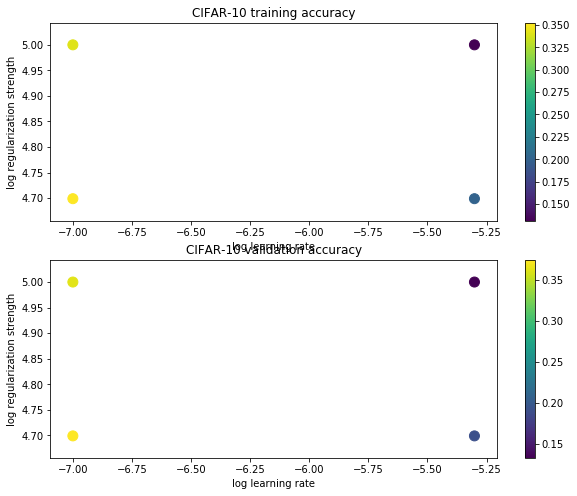

In [26]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c = colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')
colors = [results[x][1] for x in results]
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c = colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [27]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.130000


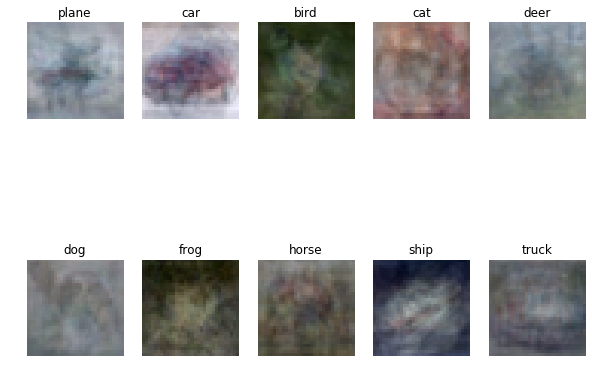

In [28]:
w = best_svm.W[:-1, :]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
  plt.subplot(2, 5, i + 1)
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])